<a href="https://colab.research.google.com/github/1UC1F3R616/myGoogleCollabNotebooks/blob/master/NewsClassificationUsingNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# loading the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
# defining all the categories
categories = data.target_names
print(categories)

In [0]:
# Training the data on these categories
train = fetch_20newsgroups(subset='train', categories=categories)
# Testing the data for these categories
test = fetch_20newsgroups(subset='test', categories=categories)

In [0]:
print(train.data[5])

In [0]:
# Importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# creating a model based on Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Training the model with the train data
model.fit(train.data, train.target)
# Creating Labels for the test data
labels = model.predict(test.data)

Text(89.17999999999999, 0.5, 'predicted label')

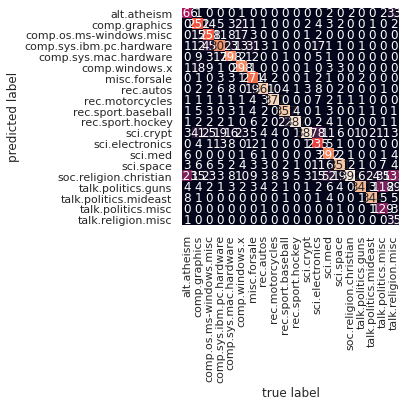

In [13]:
# Creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            , xticklabels=train.target_names
            , yticklabels=train.target_names)
# Plotting Heatmap of confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

In [0]:
# Predicting category on new data based on trained model
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]


In [21]:
predict_category('President of India')

'talk.politics.misc'